In [253]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [254]:
internal_std = 0.15

In [255]:
"""length = 1000
size_1 = np.arange(-10, 10, 0.5)

std_1 = 0.2
size_2 = np.arange(-10, 10, 1)
std_2 = 1

rows = []

for j in range(len(size_2)):
    for i in size_1:
        for _ in range(length):
            rows.append([j, i, std_1, size_2[j], std_2])

df = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])

filename = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\test_complet_p4_plot_mean.csv"
df.to_csv(filename, index=False)

print("Fichier généré :", filename)
"""

'length = 1000\nsize_1 = np.arange(-10, 10, 0.5)\n\nstd_1 = 0.2\nsize_2 = np.arange(-10, 10, 1)\nstd_2 = 1\n\nrows = []\n\nfor j in range(len(size_2)):\n    for i in size_1:\n        for _ in range(length):\n            rows.append([j, i, std_1, size_2[j], std_2])\n\ndf = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])\n\nfilename = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\test_complet_p4_plot_mean.csv"\ndf.to_csv(filename, index=False)\n\nprint("Fichier généré :", filename)\n'

In [256]:
file = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\answers_evo_mean\\experiment_results_100.csv"

inverser = True   
    

In [257]:
def info(file_path):
    df = pd.read_csv(file_path)
    nb_psycho = df['S2_val'].to_numpy()
    nb_psycho = pd.unique(nb_psycho)   #11
    len_block = df['S1_val'].to_numpy() #41
    len_block = pd.unique(len_block) 
    s1_0 = df['S1_val'].iloc[0]
    s2_0 = df['S2_val'].iloc[0]
    nb_iteration = df[(df['S1_val'] == s1_0) & (df['S2_val'] == s2_0)].shape[0]
    return len(list(len_block)),len(list(nb_psycho)), nb_iteration

def psychometric_curves(data_tuple, len_block, nb_psycho, nb_iteration):
    result, mean_used = data_tuple
    
    all_psychos = []  # liste de [ [moyennes pour chaque S1_val] pour chaque psycho ]
    all_means = []    # idem pour mean_used
    iteration_block = nb_iteration*len_block
    for psycho in range(nb_psycho):   # si tu veux toutes les courbes
        true_array_result = []
        true_array_mean_used = []
        
        for i in range(len_block):
            # indices de début/fin pour ce (psycho, i)
            start = iteration_block * psycho + nb_iteration * i
            end   = start + nb_iteration

            # bloc de result
            block_r = result[start:end]
            mean_r = sum(block_r) / len(block_r)
            true_array_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[start:end]
            mean_m = sum(block_m) / len(block_m)
            true_array_mean_used.append(mean_m)

        all_psychos.append(true_array_result)
        all_means.append(true_array_mean_used)
    
    return all_psychos, all_means

def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    return data_tuple
 
def calculate_xstars(mean_used_all, mean_res_all):
    """
    Renvoie uniquement les x_star (croisements avec 0.5)
    sans tracer les courbes.
    """

    seuil = 0.5
    x_stars = []

    #print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        """if x_cross is not None:
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')"""

        x_stars.append(x_cross)

    return x_stars

 
def main(file_path, inverser):
    data_tuple = reading_csv(file_path, inverser=inverser)
    len_block ,nb_psycho, nb_iteration = info(file_path)
    array_mean_result, array_mean_used = psychometric_curves(data_tuple, len_block, nb_psycho, nb_iteration)
    x_stars = []
    for i in range(len(array_mean_result)):
        x_star = calculate_xstars(array_mean_used, array_mean_result)
        x_stars.append(x_star)
    return x_stars

x_stars = main(file_path=file , inverser=inverser)
print("x_stars from main :", x_stars)



x_stars from main : [[-4.013245033112582, -3.6012145748987856, -3.2674825174825175, -2.997844827586207, -2.617241379310345, -2.3204225352112675, -1.9711191335740073, -1.6276223776223775, -1.302013422818792, -1.00513698630137, -0.622977346278317, -0.3029197080291971, 0.023076923076923096, 0.35351562500000006, 0.7070895522388059, 1.0, 1.331746031746032, 1.6818181818181819, 2.0193661971830985, 2.3394160583941606], [-4.013245033112582, -3.6012145748987856, -3.2674825174825175, -2.997844827586207, -2.617241379310345, -2.3204225352112675, -1.9711191335740073, -1.6276223776223775, -1.302013422818792, -1.00513698630137, -0.622977346278317, -0.3029197080291971, 0.023076923076923096, 0.35351562500000006, 0.7070895522388059, 1.0, 1.331746031746032, 1.6818181818181819, 2.0193661971830985, 2.3394160583941606], [-4.013245033112582, -3.6012145748987856, -3.2674825174825175, -2.997844827586207, -2.617241379310345, -2.3204225352112675, -1.9711191335740073, -1.6276223776223775, -1.302013422818792, -1.00

In [258]:
def compute_tau_p(alpha, tau_test, tau_ref):
    numerator = tau_test * tau_ref * (1 - alpha)
    denominator = alpha * tau_test - tau_ref
    return numerator / denominator

def compute_mu_p(tp, tref, ttest, beta):
    val = (tp * (ttest - tref)) / (ttest*(tref + tp))
    return beta / val
    

For  0  trials :
mean = -3.025311352826777
std=  0.6100550732612657


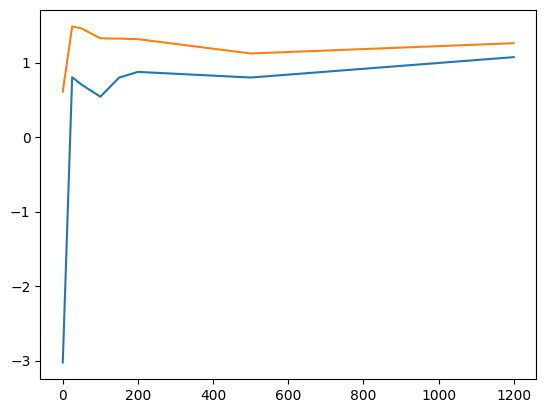

In [259]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def find_mean_std(x_stars):
    vals =  np.arange(-10, 10, 1)
    X = np.array(vals).reshape(-1, 1)
    means , var = [], []
    for i in range(len(x_stars)):
        y = np.array(x_stars[i])
        reg = LinearRegression().fit(X, y)

        a = reg.coef_[0]       # pente
        b = reg.intercept_     # offset
        a = reg.coef_[0]       # pente
        b = reg.intercept_  
        std_t = 0.2
        std_r = 1
        internal_std = 0.15
        ttest = 1/((std_t)**2 + internal_std**2)
        tref = 1/((std_r)**2 + internal_std**2)
        alpha = a
        beta = b
        tp = compute_tau_p(alpha, ttest, tref)
        mean = compute_mu_p(tp, tref, ttest, beta)
        """print("std= " , (1/(tp**0.5)))
        print("mean =", mean)"""
        std = (1/(tp**0.5))
        means.append(mean)
        var.append(std**2)
    return np.mean(means), np.mean(var)
    

val2 = [0,1,3,5,7,9,12,15,20,25,50] 
val = [0,25,50,100,150,200,500,1200]
means = []
stds = []
for v in val:
    file = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\answers_evo_mean_p5\\experiment_results_" + str(v) + ".csv"
    inverser = True   
    x_stars = main(file_path=file , inverser=inverser)
    """print("For ", v, " trials :")"""
    mean, var = find_mean_std(x_stars)
    means.append(mean)
    stds.append(var**0.5)
    if v == 0 or v == 2000 :
        print("For ", v, " trials :")
        print("mean =", mean)
        print("std= " , var**0.5)
plt.plot(val, means)
plt.plot(val, stds)

C:\Users\gabri\AppData\Local\Temp\ipykernel_86860\2923885537.py:13: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_std, _ = curve_fit(exp_model, val, stds, p0=[sigma_env, 1.0, 0.1])


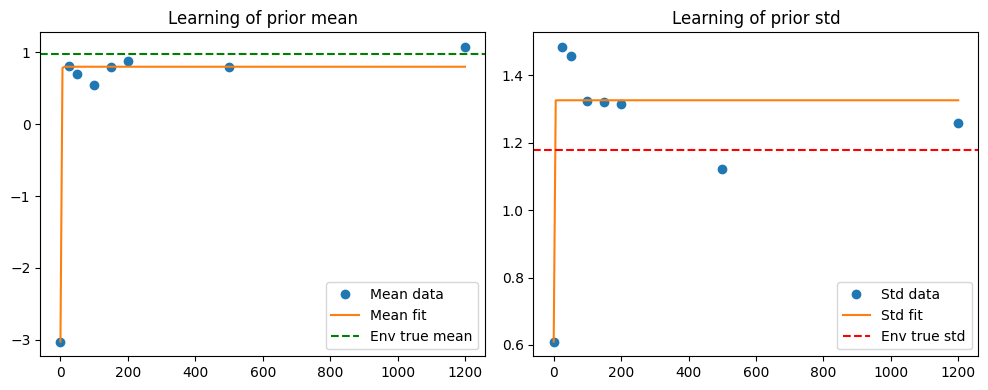

=== Fitted parameters for mean ===
a=0.7990, b=3.8243, c=0.8967

=== Fitted parameters for std ===
a=1.3263, b=0.7163, c=1.2410


In [260]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def exp_model(x, a, b, c):
    return a - b * np.exp(-c * x)

# Fit de la moyenne
popt_mean, _ = curve_fit(exp_model, val, means, p0=[mu_env, 4.0, 0.2])
a_m, b_m, c_m = popt_mean

# Fit de la variance (ou std)
popt_std, _ = curve_fit(exp_model, val, stds, p0=[sigma_env, 1.0, 0.1])
a_s, b_s, c_s = popt_std

# Grille pour smoother
xfit = np.linspace(0, max(val), 200)
yfit_mean = exp_model(xfit, *popt_mean)
yfit_std  = exp_model(xfit, *popt_std)

# Plot Mean
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(val, means, 'o', label="Mean data")
plt.plot(xfit, yfit_mean, '-', label="Mean fit")
plt.axhline(mu_env, linestyle='--', color='green', label="Env true mean")
plt.legend()
plt.title("Learning of prior mean")

# Plot Variance / Std
plt.subplot(1,2,2)
plt.plot(val, stds, 'o', label="Std data")
plt.plot(xfit, yfit_std, '-', label="Std fit")
plt.axhline(sigma_env, linestyle='--', color='red', label="Env true std")
plt.legend()
plt.title("Learning of prior std")

plt.tight_layout()
plt.show()

# Affichage paramètres
print("=== Fitted parameters for mean ===")
print(f"a={a_m:.4f}, b={b_m:.4f}, c={c_m:.4f}")

print("\n=== Fitted parameters for std ===")
print(f"a={a_s:.4f}, b={b_s:.4f}, c={c_s:.4f}")


In [261]:
def mu_1(files):
    means = []
    vars = []
    for file in files :
        x_stars = main(file_path=file , inverser=inverser)
        """print("For ", v, " trials :")"""
        mean,var = find_mean_std(x_stars)
        means.append(mean)
        vars.append(var)
    return np.mean(means), np.mean(vars) 


def find_eta_mu(mean_up_1, mu_init, mu_env, std_init, internal_std):
    top = mean_up_1 - mu_init
    bottom = mu_env - mu_init
    return (top / bottom) * (std_init**2) # ou + internal_std**2


def find_eta_sigma(var_up_1, mu_init, mu_env, std_init, std_env, internal_std):
    top = var_up_1 - std_init**2
    bottom = (std_env**2 
              + (mu_env - mu_init)**2 
              - std_init**2)
    return (top / bottom) * ( 2 * (std_init**2)**2)  # le * 2 vraiment utile ????? 


mu_env = 0.97
sigma_env = 1.18
sigma_init = 0.61
mu_init = -3.03
internal_std = 0.15

files = [f"C:\\Users\\gabri\\Desktop\\bayesian\\test\\answers_evo_means_dario\\experiment_results_{i}.csv" for i in range(0, 11)]
moy_mean , moy_var = mu_1(files=files)
eta_mu = find_eta_mu(moy_mean, mu_init, mu_env, sigma_init,internal_std)
eta_sigma = find_eta_sigma(moy_var, mu_init, mu_env, sigma_init, sigma_env, internal_std)


In [262]:
print("eta mu :", eta_mu)
print("eta sigma :", eta_sigma)

eta mu : 0.08566228925522137
eta sigma : 0.009171432070137363
